- This notebook is try to train FM with the Miscibility dataset

In [2]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

from miscibility import *
import torch

In [69]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [4]:
file_path ='../../data/Matrix/Chemical_name_smiles_update.csv'

In [5]:
df_chemical = pd.read_csv(file_path)
df_chemical.head()

,Chmical_Name,SMILES,Source
0,3-[(3-cholamidopropyl)dimethylammonio]-1- prop...,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,NaN
1,"4-(1,1,3,3-Tetramethylbutyl)phenyl-polyethylen...",CC(C)(C)CC(C)(C)C1=CC=C(C=C1)OCCO,NaN
2,Alginic Acid,[C@H]1([C@@H]([C@@H](OC([C@H]1O)C(=O)O)O[C@H]2...,NaN
3,Amylopectin,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]2[...,NaN
4,Bovine Serum Albumin,NaN,NaN


In [6]:
df_chemical.shape

(68, 3)

In [7]:
file_path1='../../data/Matrix/pairs.csv'
df_pairs = pd.read_csv(file_path1, header=None)
df_pairs.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,1,1,1,1,1
2,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
3,1,1,0,1,1,1,0,0,0,1,...,1,1,0,1,1,0,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
df_pairs.shape

(68, 68)

In [9]:
# Identify indices where SMILES is not NaN
valid_indices = df_chemical[df_chemical['SMILES'].notna()].index

# Filter df_chemical
df_chemical_cleaned = df_chemical.loc[valid_indices].reset_index(drop=True)

# Filter df_pairs (both rows and columns)
df_pairs_cleaned = df_pairs.loc[valid_indices, valid_indices].reset_index(drop=True)
df_pairs_cleaned.columns = range(len(df_pairs_cleaned))  # reset column names to 0,1,2,...

print(df_chemical_cleaned.shape)
print(df_pairs_cleaned.shape)

(53, 3)
(53, 53)


In [10]:
valid_indices

Index([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 21, 22,
       23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44,
       45, 46, 48, 49, 50, 51, 52, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65],
      dtype='int64')

In [11]:
file_path2 = '../../data/Matrix/compounds.csv'
df_compouds = pd.read_csv(file_path2)
df_compouds.head()

,ID,NAME,CLASS,monomer_mw,XlogP3,h-bond_donors,h-bond_acceptors,complexity,concentration,polymer_mw
0,1,CHAPS,Surfactant,614.9,2.9,4.0,7.0,1030.0,20.0,614.0
1,2,Triton X-100,Surfactant,527.7,-2.0,1190.0,1704.0,731.0,25.0,80000.0
2,3,Alg,Polymer,448.5,-3.6,2676.0,4348.0,511.0,4.0,150000.0
3,4,AP,Polymer,828.7,-10.6,6516.0,12690.0,1210.0,10.0,213700.0
4,5,BSA,Protein,331.8,-2.3,1190.0,1704.0,391.0,40.0,66000.0


In [12]:
df_compouds_cleaned = df_compouds.loc[valid_indices].reset_index(drop=True)

In [13]:
df_chem_com = pd.concat([df_chemical_cleaned.iloc[:,0:2], df_compouds_cleaned.iloc[:,:]], axis=1)
df_chem_com.head()

,Chmical_Name,SMILES,ID,NAME,CLASS,monomer_mw,XlogP3,h-bond_donors,h-bond_acceptors,complexity,concentration,polymer_mw
0,3-[(3-cholamidopropyl)dimethylammonio]-1- prop...,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,1,CHAPS,Surfactant,614.9,2.9,4.0,7.0,1030.0,20.0,614.0
1,"4-(1,1,3,3-Tetramethylbutyl)phenyl-polyethylen...",CC(C)(C)CC(C)(C)C1=CC=C(C=C1)OCCO,2,Triton X-100,Surfactant,527.7,-2.0,1190.0,1704.0,731.0,25.0,80000.0
2,Alginic Acid,[C@H]1([C@@H]([C@@H](OC([C@H]1O)C(=O)O)O[C@H]2...,3,Alg,Polymer,448.5,-3.6,2676.0,4348.0,511.0,4.0,150000.0
3,Amylopectin,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]2[...,4,AP,Polymer,828.7,-10.6,6516.0,12690.0,1210.0,10.0,213700.0
4,Carageenan (Iota),C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)OS(=...,6,Iota-Car,Polymer,625.7,-5.0,7089.0,16497.0,998.0,1.0,671875.0


In [14]:
df_chem_com.to_csv('df_chem_com_20250501_1.csv', index=False)

In [15]:
df_chem_com.shape

(53, 12)

In [16]:
def calculate_mM(concentration_percent, monomer_mw):
    """
    concentration_percent: % w/w (grams solute per 100 g solution)
    monomer_mw: g/mol (monomer molecular weight)

    returns: concentration in mM in final 20 µL solution (after adding 10 µL molecule solution to 10 µL other solution)
    """
    
    if pd.isna(concentration_percent) or pd.isna(monomer_mw) or monomer_mw == 0:
        return np.nan

    # grams of solute in 10 µL
    grams_per_100ml = concentration_percent / 100  # g/mL
    volume_added_ml = 10 / 1000  # 10 µL → mL
    grams_solute = grams_per_100ml * volume_added_ml

    # moles of solute
    moles_solute = grams_solute / monomer_mw

    # calculate molarity in final 20 µL (0.00002 L)
    total_volume_L = 20 / 1_000_000 
    molarity_M = moles_solute / total_volume_L

    # convert to mM
    molarity_mM = molarity_M * 1000

    return molarity_mM

In [17]:
df_chem_com['concentration_mM'] = df_chem_com.apply(
    lambda row: calculate_mM(row['concentration'], row['monomer_mw']), axis=1
)

df_chem_com

,Chmical_Name,SMILES,ID,NAME,CLASS,monomer_mw,XlogP3,h-bond_donors,h-bond_acceptors,complexity,concentration,polymer_mw,concentration_mM
0,3-[(3-cholamidopropyl)dimethylammonio]-1- prop...,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,1,CHAPS,Surfactant,614.9,2.9,4.0,7.0,1030.0,20.0,614.0,162.628070
1,"4-(1,1,3,3-Tetramethylbutyl)phenyl-polyethylen...",CC(C)(C)CC(C)(C)C1=CC=C(C=C1)OCCO,2,Triton X-100,Surfactant,527.7,-2.0,1190.0,1704.0,731.0,25.0,80000.0,236.877013
2,Alginic Acid,[C@H]1([C@@H]([C@@H](OC([C@H]1O)C(=O)O)O[C@H]2...,3,Alg,Polymer,448.5,-3.6,2676.0,4348.0,511.0,4.0,150000.0,44.593088
3,Amylopectin,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]2[...,4,AP,Polymer,828.7,-10.6,6516.0,12690.0,1210.0,10.0,213700.0,60.335465
4,Carageenan (Iota),C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)OS(=...,6,Iota-Car,Polymer,625.7,-5.0,7089.0,16497.0,998.0,1.0,671875.0,7.991050
5,Carageenan (Kappa),C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)O)O[...,7,Kappa-Car,Polymer,788.7,-8.5,2434.0,7607.0,1380.0,1.0,240000.0,6.339546
6,Carageenan (Lambda),C(C1C(C(C(C(O1)OC2C(OC(C(C2O)OS(=O)(=O)[O-])O)...,8,Lambda-Car,Polymer,594.5,-3.9,7246.0,22947.0,1030.0,2.0,718000.0,16.820858
7,Carboxymethyl Cellulose,CC(=O)O.C(C(C(C(C(C=O)O)O)O)O)O,9,CMC,Polymer,240.2,-2.0,2248.0,2998.0,169.0,5.0,90000.0,104.079933
8,Carboxymethyl Dextran,C(C1C(C(C(C(O1)OCC2C(C(C(C(O2)OCC(C(C(C(C=O)OC...,10,CM-Dex,Polymer,731.1,-5.0,3473.0,5784.0,1184.0,20.0,250000.0,136.780194
9,Casein,CC(C)CC(C(=NC(CCC(=N)O)C(=NC(CC(=O)O)C(=NC(CCC...,11,Cas,Protein,2062.0,-0.8,362.0,516.0,4830.0,10.0,22000.0,24.248303


In [18]:
df_chem_com.shape

(53, 13)

In [19]:
df_pairs_cleaned.shape

(53, 53)

In [20]:
def is_symmetric(matrix):
    """
    Checks if a square matrix is symmetric.

    Args:
        matrix (list of lists or numpy.ndarray): The matrix to check.

    Returns:
        bool: True if the matrix is symmetric, False otherwise.
    """
    # Ensure it's a NumPy array for easier manipulation
    matrix = np.array(matrix)

    # Check if the matrix is square
    if matrix.shape[0] != matrix.shape[1]:
        return False  # A non-square matrix cannot be symmetric

    # Check for symmetry: compare the matrix to its transpose
    return np.allclose(matrix, matrix.T) # Use np.allclose for floating-point comparisons

matrix_data = df_pairs_cleaned

# Check if the matrix is symmetric
if is_symmetric(matrix_data):
    print("The matrix is symmetric.")
else:
    print("The matrix is not symmetric.")

The matrix is symmetric.


In [21]:
# Get mixture formulation
#  Create mapping from index to SMILES and concentration_mM
smiles_map = df_chem_com['SMILES'].to_dict()  # index → SMILES
conc_map = df_chem_com['concentration_mM'].to_dict()  # index → concentration_mM

# Generate all unique binary pairs (i < j) 
pairs = list(combinations(range(len(df_chem_com)), 2))  # (i,j) where i < j

# Construct rows 
rows = []
for i, j in pairs:
    smi1 = smiles_map[i]
    conc1 = conc_map[i]
    smi2 = smiles_map[j]
    conc2 = conc_map[j]
    miscibility = df_pairs_cleaned.iloc[i, j]  

    row = {
        'smi1': smi1,
        'conc1': conc1,
        'smi2': smi2,
        'conc2': conc2,
        'miscibility': miscibility
    }
    rows.append(row)

df_mixture = pd.DataFrame(rows)

df_mixture = df_mixture[['smi1', 'conc1', 'smi2', 'conc2', 'miscibility']]

In [22]:
df_mixture.shape # 53 * (53 - 1) / 2 

(1378, 5)

In [24]:
df_mixture.head()

,smi1,conc1,smi2,conc2,miscibility
0,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,CC(C)(C)CC(C)(C)C1=CC=C(C=C1)OCCO,236.877013,1
1,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,[C@H]1([C@@H]([C@@H](OC([C@H]1O)C(=O)O)O[C@H]2...,44.593088,1
2,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]2[...,60.335465,1
3,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)OS(=...,7.991050,1
4,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)O)O[...,6.339546,1


In [ ]:
df_mixture.to_csv('df_mixture_20250502.csv', index=False)

In [45]:
# Now we can start train model with FM representation

In [27]:
df_train_emb, x_smi = get_latent_space_m(df_mixture)

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 53/53 [00:01<00:00, 39.57it/s]
/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_81489/87061925.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


In [34]:
x_smi

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.396622,-0.485244,0.073829,0.363909,0.468765,-0.707002,1.107883,0.048230,0.851008,0.102786,...,-1.295732,-0.016802,0.210699,0.292674,-0.604047,0.554287,-0.783447,0.751108,0.594072,-0.080489
1,0.426807,-0.511176,0.063942,0.362977,0.399048,-0.775012,1.071118,0.036969,0.956024,0.114717,...,-1.336209,-0.003823,0.298028,0.281305,-0.605786,0.588821,-0.834901,0.680230,0.599377,-0.122557
2,0.435105,-0.495445,0.050651,0.362118,0.428933,-0.743644,1.080636,0.026108,0.948122,0.095583,...,-1.328855,-0.019030,0.320801,0.283548,-0.590604,0.586896,-0.857433,0.662571,0.570647,-0.103189
3,0.431270,-0.506898,0.064336,0.349437,0.377875,-0.781025,1.074736,0.027446,0.971289,0.140413,...,-1.320555,0.003030,0.317536,0.269966,-0.617953,0.582582,-0.868878,0.668550,0.587808,-0.084291
4,0.433459,-0.509713,0.064572,0.350700,0.375404,-0.779854,1.074978,0.027310,0.969275,0.141410,...,-1.322345,0.003166,0.317095,0.268148,-0.617761,0.585752,-0.871287,0.669175,0.590898,-0.083505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,0.353657,-0.414267,0.102327,0.445108,0.459639,-0.682479,1.091200,0.081897,0.914820,0.132219,...,-1.314747,-0.202788,0.253820,0.336689,-0.553314,0.484660,-0.539699,0.854958,0.579914,-0.128316
1374,0.385577,-0.472448,0.072665,0.489218,0.396895,-0.637906,1.023206,-0.000365,0.920996,0.091516,...,-1.317363,-0.166163,0.191220,0.277527,-0.640049,0.386586,-0.553646,0.893802,0.625702,-0.299325
1375,0.338395,-0.401601,0.113714,0.414367,0.412641,-0.735064,1.148112,0.070444,0.919846,0.147542,...,-1.250000,-0.137573,0.300471,0.362525,-0.544607,0.522617,-0.642987,0.819608,0.572416,-0.011639
1376,0.374499,-0.468112,0.080034,0.463810,0.338095,-0.686102,1.072339,-0.024961,0.927203,0.101311,...,-1.250008,-0.092301,0.230443,0.295496,-0.644234,0.411274,-0.663872,0.862763,0.624875,-0.203440


In [29]:
df_train_emb

,smi1,conc1,smi2,conc2,miscibility
0,"[0.43436676263809204, -0.5092658400535583, 0.0...",0.407074,"[0.37070798873901367, -0.46875208616256714, 0....",0.592926,1
1,"[0.43436676263809204, -0.5092658400535583, 0.0...",0.784804,"[0.39923763275146484, -0.5181440114974976, 0.0...",0.215196,1
2,"[0.43436676263809204, -0.5092658400535583, 0.0...",0.729393,"[0.43709638714790344, -0.45819392800331116, 0....",0.270607,1
3,"[0.43436676263809204, -0.5092658400535583, 0.0...",0.953164,"[0.36824312806129456, -0.45870381593704224, 0....",0.046836,1
4,"[0.43436676263809204, -0.5092658400535583, 0.0...",0.962481,"[0.4101769030094147, -0.5211842656135559, 0.12...",0.037519,1
...,...,...,...,...,...
1373,"[0.4185637831687927, -0.4767872989177704, 0.08...",0.453572,"[0.2997805178165436, -0.3623706102371216, 0.11...",0.546428,1
1374,"[0.4185637831687927, -0.4767872989177704, 0.08...",0.471851,"[0.3561071455478668, -0.4685714840888977, 0.06...",0.528149,1
1375,"[0.40315836668014526, -0.467397004365921, 0.10...",0.373527,"[0.2997805178165436, -0.3623706102371216, 0.11...",0.626473,1
1376,"[0.40315836668014526, -0.467397004365921, 0.10...",0.390888,"[0.3561071455478668, -0.4685714840888977, 0.06...",0.609112,0


In [35]:
df_total = pd.concat([x_smi, df_train_emb['miscibility']],axis=1)
df_total

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,miscibility
0,0.396622,-0.485244,0.073829,0.363909,0.468765,-0.707002,1.107883,0.048230,0.851008,0.102786,...,-0.016802,0.210699,0.292674,-0.604047,0.554287,-0.783447,0.751108,0.594072,-0.080489,1
1,0.426807,-0.511176,0.063942,0.362977,0.399048,-0.775012,1.071118,0.036969,0.956024,0.114717,...,-0.003823,0.298028,0.281305,-0.605786,0.588821,-0.834901,0.680230,0.599377,-0.122557,1
2,0.435105,-0.495445,0.050651,0.362118,0.428933,-0.743644,1.080636,0.026108,0.948122,0.095583,...,-0.019030,0.320801,0.283548,-0.590604,0.586896,-0.857433,0.662571,0.570647,-0.103189,1
3,0.431270,-0.506898,0.064336,0.349437,0.377875,-0.781025,1.074736,0.027446,0.971289,0.140413,...,0.003030,0.317536,0.269966,-0.617953,0.582582,-0.868878,0.668550,0.587808,-0.084291,1
4,0.433459,-0.509713,0.064572,0.350700,0.375404,-0.779854,1.074978,0.027310,0.969275,0.141410,...,0.003166,0.317095,0.268148,-0.617761,0.585752,-0.871287,0.669175,0.590898,-0.083505,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,0.353657,-0.414267,0.102327,0.445108,0.459639,-0.682479,1.091200,0.081897,0.914820,0.132219,...,-0.202788,0.253820,0.336689,-0.553314,0.484660,-0.539699,0.854958,0.579914,-0.128316,1
1374,0.385577,-0.472448,0.072665,0.489218,0.396895,-0.637906,1.023206,-0.000365,0.920996,0.091516,...,-0.166163,0.191220,0.277527,-0.640049,0.386586,-0.553646,0.893802,0.625702,-0.299325,1
1375,0.338395,-0.401601,0.113714,0.414367,0.412641,-0.735064,1.148112,0.070444,0.919846,0.147542,...,-0.137573,0.300471,0.362525,-0.544607,0.522617,-0.642987,0.819608,0.572416,-0.011639,1
1376,0.374499,-0.468112,0.080034,0.463810,0.338095,-0.686102,1.072339,-0.024961,0.927203,0.101311,...,-0.092301,0.230443,0.295496,-0.644234,0.411274,-0.663872,0.862763,0.624875,-0.203440,0


In [54]:
df_total.to_csv('df_total_20250501.csv', index=False)

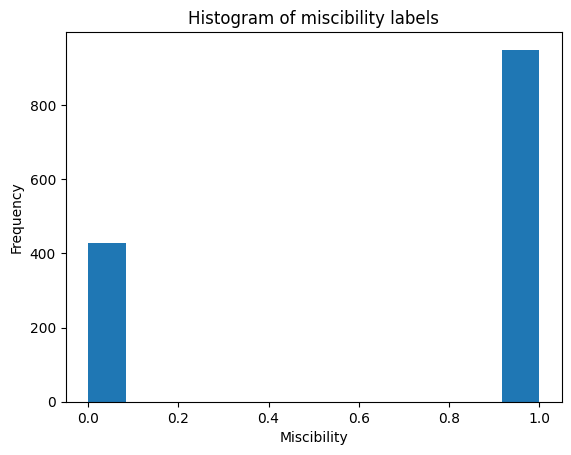

In [55]:
# Data distribution
plt.hist(df_total['miscibility'], bins='auto')  
plt.xlabel('Miscibility')
plt.ylabel('Frequency')
plt.title('Histogram of miscibility labels')
plt.show()